<a href="https://colab.research.google.com/github/qubit19/QBMvsRBM/blob/main/QBMvsRBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pennylane --upgrade
!pip install torch --upgrade
!pip install scikit-learn matplotlib seaborn pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571

In [ ]:
import numpy as np
import torch


# Example: Bars & Stripes (2x2) -> flatten to 4 bits
# H: 1100, V: 1010
data = np.array([
    [1, 1, 0, 0], # Bar 1
    [0, 0, 1, 1], # Bar 2
    # [1, 0, 1, 0], # Stripe 1 (Optional)
    # [0, 1, 0, 1]  # Stripe 2 (Optional)
]).astype(np.float32)

# Convert to PyTorch Tensor
data_torch = torch.tensor(data)
print("Dataset shape:", data_torch.shape)
print("Dataset:\n", data_torch)

# --- Configuration ---
n_visible = data.shape[1]
n_hidden_rbm = 2  # Example hidden units for RBM
n_qubits = n_visible + 2 # Example: 4 visible + 2 hidden qubits = 6 total for QBM
n_hidden_qbm = n_qubits - n_visible

print(f"\nVisible units/qubits: {n_visible}")
print(f"RBM Hidden units: {n_hidden_rbm}")
print(f"QBM Total qubits: {n_qubits}")
print(f"QBM Hidden qubits: {n_hidden_qbm}")

Dataset shape: torch.Size([2, 4])
Dataset:
 tensor([[1., 1., 0., 0.],
        [0., 0., 1., 1.]])

Visible units/qubits: 4
RBM Hidden units: 2
QBM Total qubits: 6
QBM Hidden qubits: 2


In [ ]:
from sklearn.neural_network import BernoulliRBM
import matplotlib.pyplot as plt

print("\n--- Training Classical RBM (Scikit-learn) ---")
rbm = BernoulliRBM(n_components=n_hidden_rbm, learning_rate=0.01, n_iter=100, random_state=42, verbose=1)
rbm.fit(data)

# Evaluate: Reconstruction Error (approx)
# Note: RBM reconstruction isn't perfect, just a training metric proxy
reconstructed_data = rbm.gibbs(data)
reconstruction_error_rbm = np.mean(np.sum((data - reconstructed_data)**2, axis=1))
print(f"RBM Final Reconstruction Error (approx): {reconstruction_error_rbm:.4f}")

# Generate samples
print("\nGenerating samples from RBM:")
# Start from random state and run Gibbs sampling
v_sample = torch.randint(0, 2, (5, n_visible), dtype=torch.float32) # Start with 5 random samples
for _ in range(1000): # Gibbs steps
     # Corrected line:
    v_sample_np = rbm.gibbs(v_sample.numpy()) # Use the public gibbs() method
    v_sample = torch.tensor(v_sample_np, dtype=torch.float32) # Convert back to tensor if needed later


print(v_sample.numpy())

# Save the RBM model (optional)
import pickle
with open('rbm_model.pkl', 'wb') as f:
    pickle.dump(rbm, f)
print("RBM model saved to rbm_model.pkl")


--- Training Classical RBM (Scikit-learn) ---
[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.77, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -2.79, time = 0.00s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -2.77, time = 0.00s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -2.79, time = 0.00s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -2.80, time = 0.00s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -2.79, time = 0.00s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -2.78, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -2.76, time = 0.00s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -2.77, time = 0.00s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -2.78, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -2.80, time = 0.00s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -2.81, time = 0.00s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -2.80, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -2.82, time = 0.

In [ ]:
import pennylane as qml
from pennylane import numpy as pnp # Use PennyLane's numpy for autodiff compatibility if needed
import torch.optim as optim

print("\n--- Setting up Quantum Model (QCBM) ---")

# Define the quantum device
# 'default.qubit' is a standard simulator.
# 'lightning.qubit' is faster if available (!pip install pennylane-lightning)
# If using GPU runtime with PyTorch backend: dev = qml.device('default.qubit', wires=n_qubits, backend='torch')
dev = qml.device('default.qubit', wires=n_qubits)

# Define the PQC structure (Ansatz)
# Example: Strongly Entangling Layers
def pqc_ansatz(params):
    qml.StronglyEntanglingLayers(params, wires=range(n_qubits))

# Define the QNode - outputs probabilities in the computational basis
@qml.qnode(dev, interface='torch', diff_method='parameter-shift')
def quantum_circuit(params):
    pqc_ansatz(params)
    # Return probabilities of all computational basis states
    # We only care about the visible qubits for comparison with data
    # Marginalize over hidden qubits manually later or adjust loss
    return qml.probs(wires=range(n_qubits)) # Probabilities for ALL qubits first


# Define the loss function: Compare PQC output distribution to data distribution
# Simple approach: KL Divergence or MMD. Let's try a simplified target distribution.

# 1. Calculate target probability distribution from data (only for visible qubits)
# Pad data states to full qubit width (assuming hidden qubits start at 0)
target_probs_full = torch.zeros(2**n_qubits, dtype=torch.float32)
for data_vec in data_torch:
    # Assume hidden qubits are |0...0> initially - this is a simplification!
    # A better approach would be needed for true marginalization.
    hidden_state = torch.zeros(n_hidden_qbm)
    full_state_vec = torch.cat((data_vec, hidden_state)) # Combine visible + hidden
    index = int("".join(map(str, full_state_vec.int().tolist())), 2)
    target_probs_full[index] += 1.0

target_probs_full /= len(data_torch) # Normalize

# Define loss function (e.g., simple Mean Squared Error on probabilities or KL Div)
def loss_fn(params):
    q_probs = quantum_circuit(params)

    # If target_probs_full represents the desired joint distribution:
    # loss = torch.mean((q_probs - target_probs_full)**2) # MSE Loss

    # KL Divergence (more standard for distributions)
    # Add small epsilon to avoid log(0)
    epsilon = 1e-6
    loss = torch.sum(target_probs_full * (torch.log(target_probs_full + epsilon) - torch.log(q_probs + epsilon)))
    return loss

# Initialize parameters for the PQC
# The shape depends on the chosen ansatz (StronglyEntanglingLayers needs specific shape)
param_shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits) # Example: 2 layers
params = torch.tensor(np.random.uniform(0, 2 * np.pi, size=param_shape), requires_grad=True)

# Choose an optimizer (Adam is usually good)
optimizer = optim.Adam([params], lr=0.05)

print(f"PQC Parameter shape: {param_shape}")


--- Setting up Quantum Model (QCBM) ---
PQC Parameter shape: (2, 6, 3)



--- Training Quantum Model (QCBM) ---
Epoch 10/100 - Cost: 2.0593
Epoch 20/100 - Cost: 1.3945
Epoch 30/100 - Cost: 1.1090
Epoch 40/100 - Cost: 0.8552
Epoch 50/100 - Cost: 0.7542
Epoch 60/100 - Cost: 0.7046
Epoch 70/100 - Cost: 0.6948
Epoch 80/100 - Cost: 0.6939
Epoch 90/100 - Cost: 0.6939
Epoch 100/100 - Cost: 0.6935


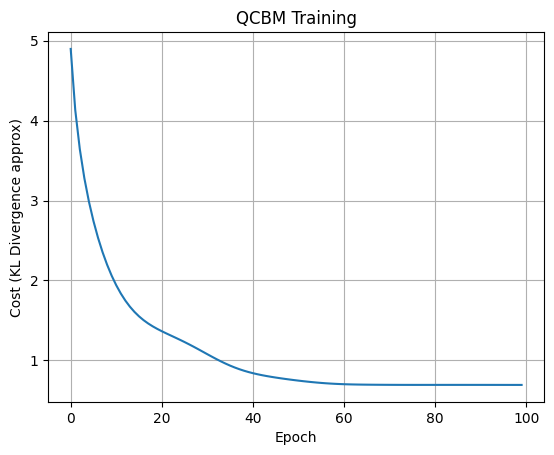

QCBM parameters saved to qcbm_params.pt


In [ ]:
print("\n--- Training Quantum Model (QCBM) ---")
epochs = 100
batch_size = len(data_torch) # Use full batch for small data
costs = []

for epoch in range(epochs):
    optimizer.zero_grad()
    cost = loss_fn(params)
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Cost: {cost.item():.4f}")

# Plot the cost
plt.figure()
plt.plot(costs)
plt.xlabel("Epoch")
plt.ylabel("Cost (KL Divergence approx)")
plt.title("QCBM Training")
plt.grid(True)
plt.savefig('qcbm_training_cost.png') # Save plot to Drive
plt.show()

# Save the trained parameters
torch.save(params, 'qcbm_params.pt')
print("QCBM parameters saved to qcbm_params.pt")


--- Evaluating Models ---
RBM Reconstruction Error (from training): 1.0
RBM Generated Samples (final):
[[1. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
QCBM Final Cost: 0.6935

QCBM Generated Samples (Visible Qubits):
[[0 0 1 1]
 [0 0 1 0]
 [1 1 0 0]
 [0 0 1 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [1 1 0 1]
 [1 1 0 0]
 [1 1 0 0]]

KL Divergence (QCBM Probs vs Data Probs): 0.6934


<ipython-input-7-b30d0fa54c73>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  kl_div_qcbm_vs_data = torch.sum(torch.tensor(target_probs_visible) * (torch.log(torch.tensor(target_probs_visible) + 1e-9) - torch.log(torch.tensor(qcbm_probs_visible) + 1e-9)))


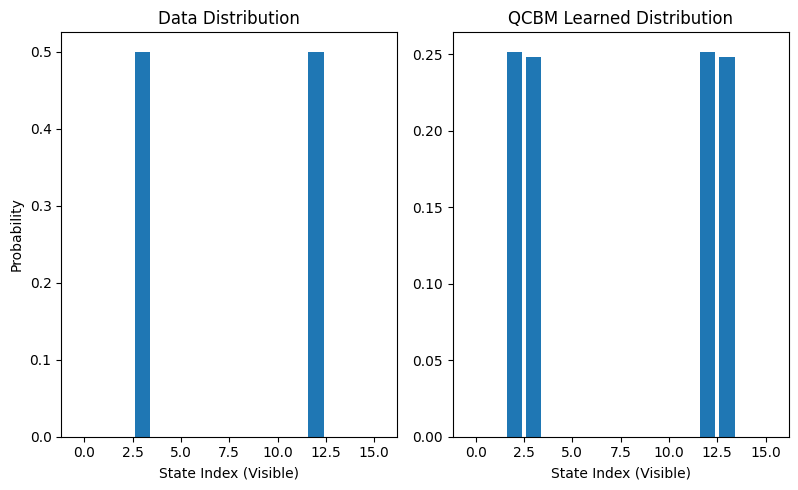

In [ ]:
print("\n--- Evaluating Models ---")

# --- RBM Evaluation ---
print("RBM Reconstruction Error (from training):", reconstruction_error_rbm)
print("RBM Generated Samples (final):")
print(v_sample.numpy())

# --- Quantum Model Evaluation ---
final_qcbm_cost = costs[-1]
print(f"QCBM Final Cost: {final_qcbm_cost:.4f}")

# Generate samples from QCBM
# Get the final probability distribution
with torch.no_grad():
    qcbm_probs = quantum_circuit(params).numpy()

# Sample from this distribution
num_samples = 10
samples_indices = np.random.choice(2**n_qubits, size=num_samples, p=qcbm_probs)

# Convert indices to binary strings/vectors
qcbm_samples_full = []
for idx in samples_indices:
    binary_repr = format(idx, f'0{n_qubits}b')
    qcbm_samples_full.append([int(bit) for bit in binary_repr])

qcbm_samples_full = np.array(qcbm_samples_full)
# Extract only the visible parts
qcbm_samples_visible = qcbm_samples_full[:, :n_visible]

print("\nQCBM Generated Samples (Visible Qubits):")
print(qcbm_samples_visible)

# --- Comparison ---
# 1. Visual Inspection: Look at generated samples vs original data.
# 2. Reconstruction Error: Harder to define directly for QCBM. Compare sample quality.
# 3. Likelihood/Distribution Match: Compare qcbm_probs (marginalized to visible) vs target_probs_full (marginalized).

# Calculate target probabilities for visible qubits only
target_probs_visible = torch.zeros(2**n_visible, dtype=torch.float32)
for data_vec in data_torch:
     index = int("".join(map(str, data_vec.int().tolist())), 2)
     target_probs_visible[index] += 1.0
target_probs_visible /= len(data_torch)

# Marginalize QCBM probabilities over hidden qubits
qcbm_probs_visible = np.zeros(2**n_visible)
for i in range(2**n_qubits):
    prob = qcbm_probs[i]
    # Get the state vector corresponding to index i
    binary_repr = format(i, f'0{n_qubits}b')
    # Extract the visible part
    visible_binary = binary_repr[:n_visible]
    visible_idx = int(visible_binary, 2)
    qcbm_probs_visible[visible_idx] += prob

# Compare distributions (e.g., using KL divergence)
kl_div_qcbm_vs_data = torch.sum(torch.tensor(target_probs_visible) * (torch.log(torch.tensor(target_probs_visible) + 1e-9) - torch.log(torch.tensor(qcbm_probs_visible) + 1e-9)))
print(f"\nKL Divergence (QCBM Probs vs Data Probs): {kl_div_qcbm_vs_data.item():.4f}")


# You would need a similar KL divergence calculation for the RBM model
# (requires estimating RBM's probability distribution, often via sampling, which is slow)
# For now, compare reconstruction error and sample quality visually.

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(range(2**n_visible), target_probs_visible.numpy())
plt.title("Data Distribution")
plt.xlabel("State Index (Visible)")
plt.ylabel("Probability")

plt.subplot(1, 3, 2)
plt.bar(range(2**n_visible), qcbm_probs_visible)
plt.title("QCBM Learned Distribution")
plt.xlabel("State Index (Visible)")

# Need RBM distribution plot here (harder to get exact)
# plt.subplot(1, 3, 3)
# ... plot RBM distribution estimate ...
# plt.title("RBM Learned Distribution (Estimate)")

plt.tight_layout()
plt.savefig('distribution_comparison.png')
plt.show()


--- Training QCBM with SGD ---
SGD Epoch 10/100 - Cost: 2.3899
SGD Epoch 20/100 - Cost: 1.7677
SGD Epoch 30/100 - Cost: 1.4907
SGD Epoch 40/100 - Cost: 1.3283
SGD Epoch 50/100 - Cost: 1.1927
SGD Epoch 60/100 - Cost: 1.0535
SGD Epoch 70/100 - Cost: 0.9214
SGD Epoch 80/100 - Cost: 0.8216
SGD Epoch 90/100 - Cost: 0.7614
SGD Epoch 100/100 - Cost: 0.7303


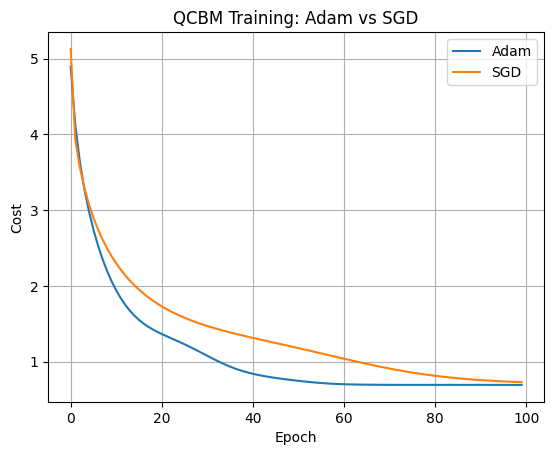

In [ ]:
# --- Extension B: Try SGD Optimizer ---
print("\n--- Training QCBM with SGD ---")
# Re-initialize parameters
params_sgd = torch.tensor(np.random.uniform(0, 2 * np.pi, size=param_shape), requires_grad=True)
optimizer_sgd = optim.SGD([params_sgd], lr=0.1) # SGD often needs different LR

costs_sgd = []
for epoch in range(epochs): # Use same number of epochs for comparison
    optimizer_sgd.zero_grad()
    cost = loss_fn(params_sgd) # Use the same loss function
    cost.backward()
    optimizer_sgd.step()
    costs_sgd.append(cost.item())
    if (epoch + 1) % 10 == 0:
        print(f"SGD Epoch {epoch+1}/{epochs} - Cost: {cost.item():.4f}")

# Plot comparison
plt.figure()
plt.plot(costs, label='Adam')
plt.plot(costs_sgd, label='SGD')
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("QCBM Training: Adam vs SGD")
plt.legend()
plt.grid(True)
plt.savefig('qcbm_optimizer_comparison.png')
plt.show()

# You would then re-evaluate the SGD-trained model like before.
# Similar modifications would apply for Extension A (modifying the PQC ansatz)
# or Extension C (changing n_qubits and retraining).